# **Chen Portsia - ML Course - Assignment 3**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

import warnings
warnings.filterwarnings("ignore")

### **Task 1:** Analysing MNIST fation data set using CNN

In [3]:
# import csv file
fation_mnist_test_df = pd.read_csv('fashion-mnist_test.csv')
fation_mnist_train_df = pd.read_csv('fashion-mnist_train.csv')

labels_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


Examples of picturs by lables:



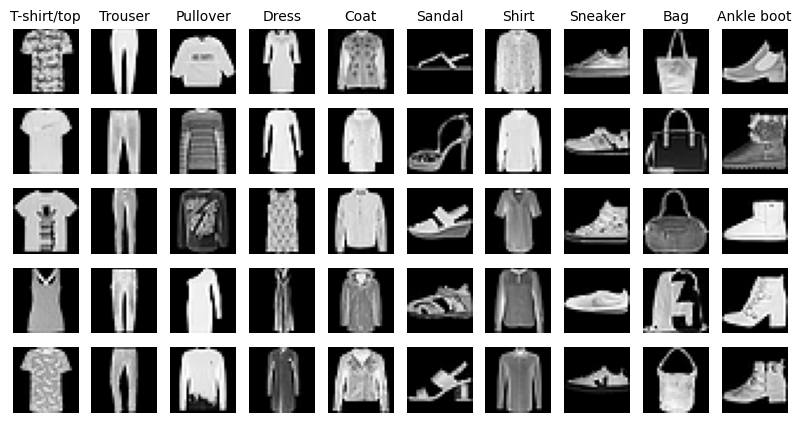

In [5]:
# Function to display 5 small images from each label with their labels
def display_images(df):
    fig, ax = plt.subplots(5, 10, figsize=(10, 5))
    for i in range(10):
        for j in range(5):
            ax[j, i].imshow(df[df['label'] == i].iloc[j, 1:].values.reshape(28, 28), cmap='gray')
            if j == 0:
                ax[j, i].set_title(labels_dict[i], fontsize=10)
            ax[j, i].axis('off')
    plt.show()
print()
print("Examples of picturs by lables:", end="\n\n")
display_images(fation_mnist_train_df)

### **Task 1.a:** Training fully connected neural networkto classify Fashion MNIST images

1. **Data Preparation**: The data is split into features (`X`) and target labels (`y`). The features are the pixel values of the images, and the target labels are the corresponding class labels. The data is then split into training and testing sets using `train_test_split`. The target labels are one-hot encoded using `to_categorical`.

2. **Model Creation and Training**: A Sequential model is created with an input layer, three hidden layers, and an output layer. The model is compiled with the Adam optimizer and categorical cross-entropy loss function. The model is then trained using the training data for 10 epochs with a batch size of 64. The model's performance is evaluated on the test data, and predictions are made on the test set.

In [8]:
# Split the data into features and target label
X = fation_mnist_train_df.iloc[:, 1:]
y = fation_mnist_train_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

model_name = 'fashion_mnist_model'

# Create the model
model = Sequential() # create a sequential model (a linear stack of layers)
model.add(Input(shape = (28*28,))) # input layer with 784 neurons (28*28 pixels)
model.add(Dense(128, activation='relu')) # hidden layer with 128 neurons
model.add(Dense(64, activation='relu')) # hidden layer with 64 neurons
model.add(Dense(32, activation='relu')) # hidden layer with 32 neurons
model.add(Dense(10, activation='sigmoid')) # output layer with 10 neurons (number of classes)
model.summary()

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) # compile the model with the adam optimizer and the categorical_crossentropy loss function

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_test, y_test)) # train the model with 10 epochs and a batch size of 64

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Predict the test set
y_pred = model.predict(X_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 1.8777 - accuracy: 0.7275 - val_loss: 0.6768 - val_accuracy: 0.7933
Epoc

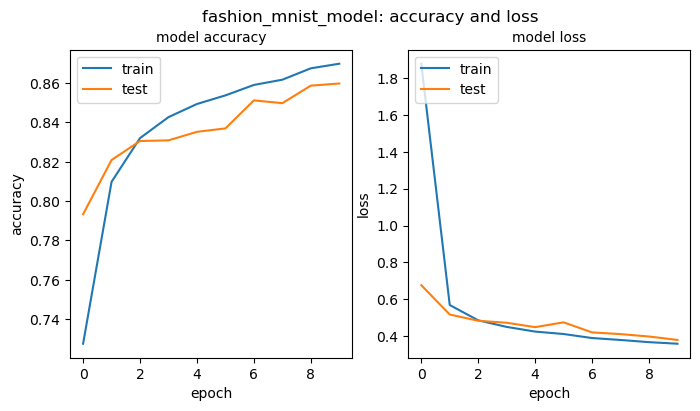

In [25]:
# Plot accuracy and loss
def plot_history(history, model_name = 'fashion_mnist_model'):
    # Plot accuracy and loss
    def plot_history(history):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
        # add title to the figure
        title = (f'{model_name}: accuracy and loss')
        fig.suptitle(title, fontsize=12)
        # plot accuracy
        axes[0].plot(history.history['accuracy'])
        axes[0].plot(history.history['val_accuracy'])
        axes[0].set_title('model accuracy', fontsize=10)
        axes[0].set_ylabel('accuracy')
        axes[0].set_xlabel('epoch')
        axes[0].legend(['train', 'test'], loc='upper left')
        # plot loss
        axes[1].plot(history.history['loss'])
        axes[1].plot(history.history['val_loss'])
        axes[1].set_title('model loss', fontsize=10)
        axes[1].set_ylabel('loss')
        axes[1].set_xlabel('epoch')
        axes[1].legend(['train', 'test'], loc='upper left')
        
        plt.show()

    plot_history(history)

plot_history(history)

<u>**Model Architecture:**</u><br>
The model is a **fully connected neural network (Sequential model)** with four dense layers:
- **Dense(128, relu)** – First hidden layer with 128 neurons.  
- **Dense(64, relu)** – Second hidden layer with 64 neurons.  
- **Dense(32, relu)** – Third hidden layer with 32 neurons.  
- **Dense(10, softmax)** – Output layer with 10 neurons for classification.  

Total **trainable parameters**: **111,146**  

<u>**Training Performance:**</u><br>
- The model was trained for **10 epochs**.  
- Initial loss decreased from **1.88** to **0.36**, and accuracy improved from **72.75%** to **86.99%** on the training set.  
- Validation accuracy started at **79.33%** and reached **85.98%**, showing consistent improvement.  
- The **validation loss decreased** steadily, indicating that the model is learning effectively without significant overfitting.  

<u>**Training and validation curves:**</u><br>
***Accuracy Plot:***<br>
The training accuracy steadily improves, reaching ~87% after 10 epochs.<br>
The test accuracy follows a similar trend but is slightly lower, stabilizing at ~86%.<br>
This indicates that the model generalizes well, with no significant signs of overfitting.

***Loss Plot:***<br>
The loss decreases rapidly in the first few epochs and then stabilizes.<br>
Both training and test loss values continue to decline, suggesting proper convergence.<br>
Some minor fluctuations in the test loss indicate potential room for fine-tuning.

<u>**Overall:**</u><br>
On the test set, the model achieved an **accuracy of 85.98%** with a final loss of **0.3798**.  
This suggests that the model generalizes well and has learned meaningful representations for the classification task.  

<u>**The following output demonstrats of the images that the model has missed predicting:**</u>

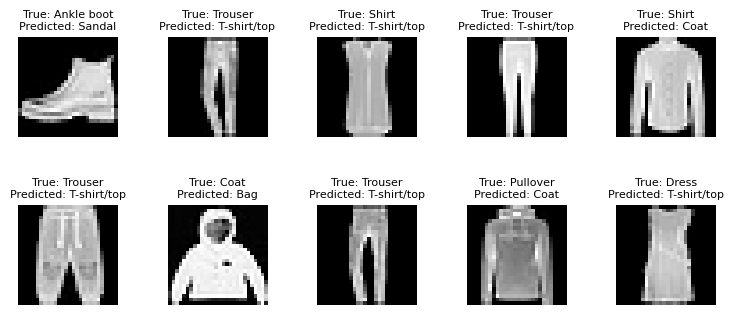

In [10]:
def display_not_matching_images(X_test, y_pred, y_test):
    # Find the indices of the images that were not classified correctly
    incorrect_indices = np.nonzero(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]

    # Plot the first 25 small test images, their predicted label, and the true label
    fig, axes = plt.subplots(2, 5, figsize=(9, 4))
    axes = axes.ravel()

    for i in np.arange(0, 10):
        axes[i].imshow(X_test.values[incorrect_indices[i]].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"True: {labels_dict[np.argmax(y_test[incorrect_indices[i]])]}\nPredicted: {labels_dict[np.argmax(y_pred[incorrect_indices[i]])]}", fontsize=8)
        axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

display_not_matching_images(X_test, y_pred, y_test)

### **Task 1.b:** CNN improvment testing using dropout, batch normalization and epoch monitization:

In [36]:
import time
import keras
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

<u><b>Model 1:</b></u> Use the basic model stractur, but add early stopping to get the sence of number of epochs needed.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
750/750 [==============================] - 6s 7ms/step - loss: 2.2474 - accuracy: 0.7174 - val_loss: 0.7066 - val_accuracy: 0.7681
Epo

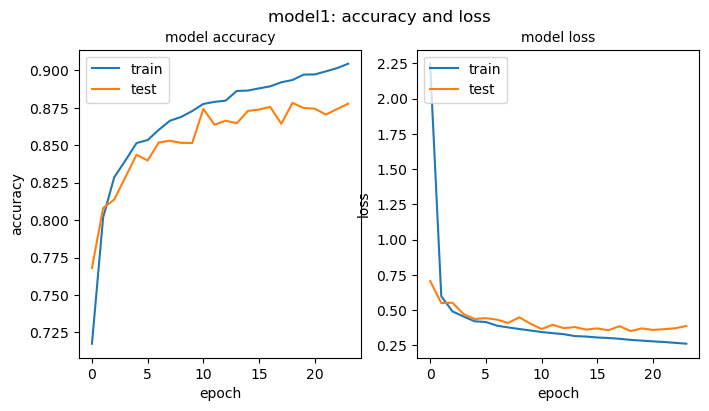

In [29]:
model1_name = 'model1'
model1_detailes = 'Layers:128, 64, 32, 10. batch: 64. Early stopping'

time_start = time.time()

# Create a model1
model1 = Sequential()
model1.add(Input(shape=(784,)))  # Specify the input shape
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='sigmoid'))
model1.summary()

# Compile the model1
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model1
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model1
loss1, accuracy1 = model1.evaluate(X_test, y_test)

# Predict the test set
y_pred1 = model1.predict(X_test)

time_end = time.time()
time1_model1 = time_end - time_start
print(f'Training and inference time for {model1_name} is {time1_model1:.2f} seconds')

model1_data = {'history': history1, 'loss': loss1, 'accuracy': accuracy1, 'model_name': model1_name, 'time': time1_model1}  

plot_history(history1, model1_name)

<u><b>Model 2:</b></u> Use the same previous model with dropout layers of 0.2 after each dense layer.

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 3.1286 - accuracy: 0.4711 - val_loss: 1.0238 - val_accuracy: 0.6540
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 1.1531 - accuracy: 0.6000 - val_loss: 0.8558 - val_accuracy: 0.6759
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.9966 - accuracy: 0.6235 - val_loss: 0.7288 - val_accuracy: 0.7218
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.9249 - accuracy: 0.6396 - val_loss: 0.7135 - val_accuracy: 0.7131
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.8538 - accuracy: 0.6655 - val_loss: 0.6503 - val_accuracy: 0.7342
Epoch 6/100
750/750 [==============================] - 3s 3ms/step - loss: 0.8011 - accuracy: 0.6849 - val_loss: 0.6578 - val_accuracy: 0.7359
Epoch 7/100
750/750 [==============================] - 3s 3ms/step - loss: 0.7588 - accuracy: 0.6957 - val_loss: 0.6450 - val_accuracy: 0.7412

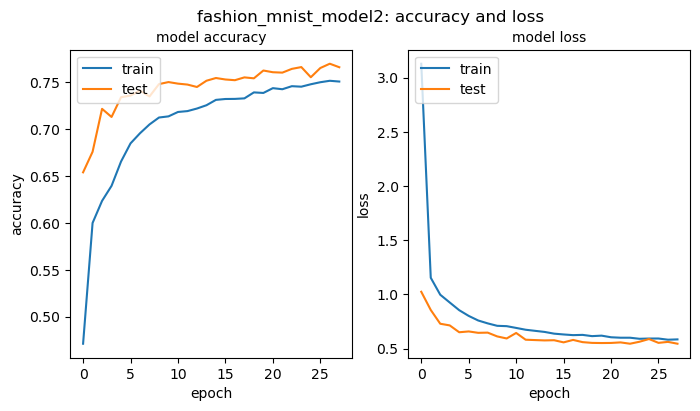

In [30]:
model2_name = 'model2'
model2_detailes = 'Layers:128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2'

time_start = time.time()

# Create a model2
model2 = Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # Dropout layer after the first dense layer
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))  # Dropout layer after the second dense layer
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))  # Dropout layer after the third dense layer
model2.add(Dense(10, activation='sigmoid'))

# Compile the model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model2
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model2
loss2, accuracy2 = model2.evaluate(X_test, y_test)

# Predict the test set
y_pred2 = model2.predict(X_test)

time_end = time.time()
time2_model2 = time_end - time_start
print(f'Training and inference time for {model2_name} is {time2_model2:.2f} seconds')

model2_data = {'history': history2, 'loss': loss2, 'accuracy': accuracy2, 'model_name': model2_name, 'time': time2_model2}

plot_history(history2, 'fashion_mnist_model2')

<u><b>Model 3:</u></b> Add Batch Normalization layers after each dense layer in the model.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

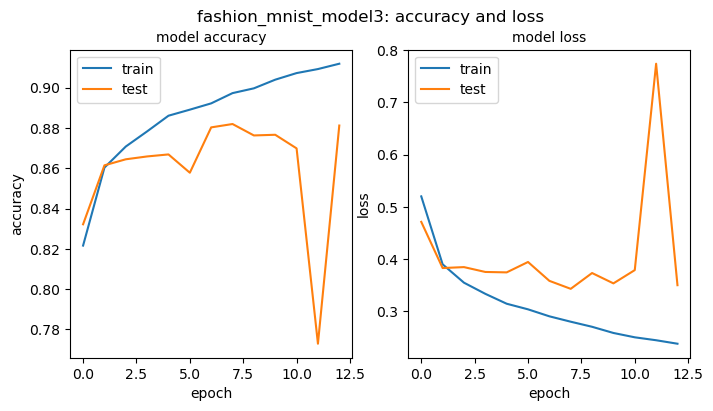

In [31]:
model3_name = 'model3'
model3_detailes = 'Layers:128, 64, 32, 10. batch: 64. Early stopping. Batch normalization'

time_start = time.time()

# Create a model3
model3 = Sequential()
model3.add(Input(shape=(784,)))
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())  # Batch Normalization layer after the first dense layer
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())  # Batch Normalization layer after the second dense layer
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())  # Batch Normalization layer after the third dense layer
model3.add(Dense(10, activation='sigmoid'))
model3.summary()

# Compile the model3
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model3
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model3
loss3, accuracy3 = model3.evaluate(X_test, y_test)

# Predict the test set
y_pred3 = model3.predict(X_test)

time_end = time.time()
time3_model3 = time_end - time_start
print(f'Training and inference time for {model3_name} is {time3_model3:.2f} seconds')

model3_data = {'history': history3, 'loss': loss3, 'accuracy': accuracy3, 'model_name': model3_name, 'time': time3_model3}

plot_history(history3, 'fashion_mnist_model3')

<u><b>Model 4:</b></u> Add dropout layers and batch normalization layers.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)               

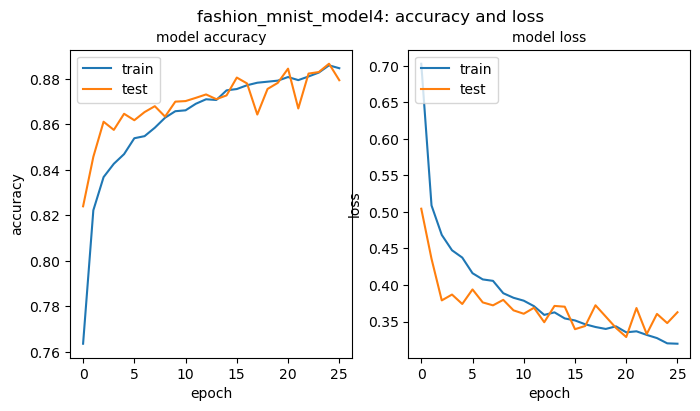

In [32]:
model4_name = 'model4'
model4_detailes = 'Layers:128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization'

time_start = time.time()

# Create a model4
model4 = Sequential()
model4.add(Input(shape=(784,)))
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(32, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='sigmoid'))

model4.summary()

# Compile the model4
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model4
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model4
loss4, accuracy4 = model4.evaluate(X_test, y_test)

# Predict the test set
y_pred4 = model4.predict(X_test)

time_end = time.time()
time4_model4 = time_end - time_start
print(f'Training and inference time for {model4_name} is {time4_model4:.2f} seconds')

model4_data = {'history': history4, 'loss': loss4, 'accuracy': accuracy4, 'model_name': model4_name, 'time': time4_model4}

plot_history(history4, 'fashion_mnist_model4')

<u><b>Model 5:</b></u> Add another layer of 256 for model 4.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)              

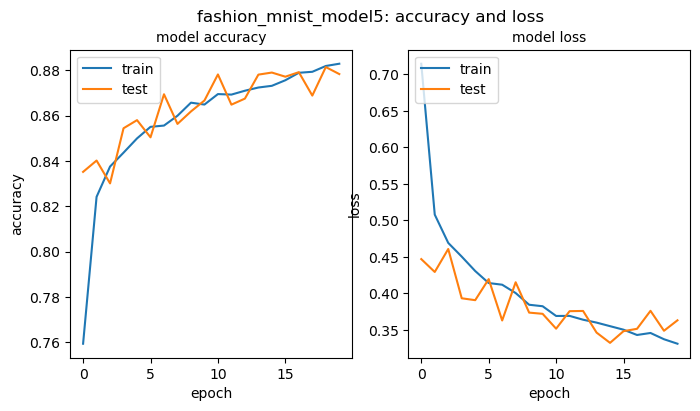

In [33]:
# Option 5: Add batch normalization
model5_name = 'model5'
model5_detailes = 'Layers:256, 128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization'

time_start = time.time()

# Create a model5
model5 = Sequential()
model5.add(Input(shape = (784,)))
model5.add(Dense(256, activation='relu'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Dropout(0.2))
model5.add(Dense(128, activation='relu'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Dropout(0.2))
model5.add(Dense(64, activation='relu'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Dropout(0.2))
model5.add(Dense(32, activation='relu'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Dropout(0.2))
model5.add(Dense(10, activation='sigmoid'))
model5.summary()

# Compile the model5
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model5
history5 = model5.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model5
loss5, accuracy5 = model5.evaluate(X_test, y_test)

# Predict the test set
y_pred5 = model5.predict(X_test)

time_end = time.time()
time5_model5 = time_end - time_start
print(f'Training and inference time for {model5_name} is {time5_model5:.2f} seconds')

model5_data = {'history': history5, 'loss': loss5, 'accuracy': accuracy5, 'model_name': model5_name, 'time': time5_model5}

plot_history(history5, 'fashion_mnist_model5')

<u><b>Model 6:</b></u> Add scalar fit to model 5.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_10 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 128)              

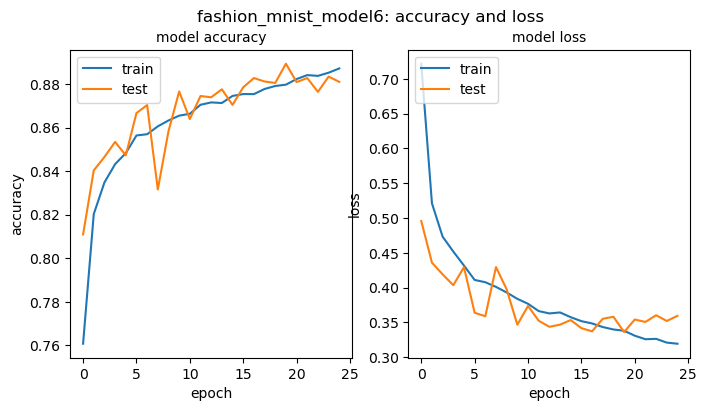

In [37]:
# Option 6: Add batch normalization and dropout layers
model6_name = 'model6'
model6_details = 'Layers:256, 128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization. Pre normliz the data'

time_start = time.time()

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a model6
model6 = Sequential()
model6.add(Input(shape = (784,)))
model6.add(Dense(256, activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))
model6.add(Dense(128, activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))
model6.add(Dense(64, activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))
model6.add(Dense(32, activation='relu'))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Dropout(0.2))
model6.add(Dense(10, activation='sigmoid'))
model6.summary()

# Compile the model6
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model6
history6 = model6.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model6
loss6, accuracy6 = model6.evaluate(X_test, y_test)

# Predict the test set
y_pred6 = model6.predict(X_test)

time_end = time.time()
time6_model6 = time_end - time_start
print(f'Training and inference time for {model6_name} is {time6_model6:.2f} seconds')

model6_data = {'history': history6, 'loss': loss6, 'accuracy': accuracy6, 'model_name': model6_name, 'time': time6_model6}

plot_history(history6, 'fashion_mnist_model6')

<u><b>Model 7:</b></u> Same configuration line model 6, lower the batch size.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_14 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_15 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 128)             

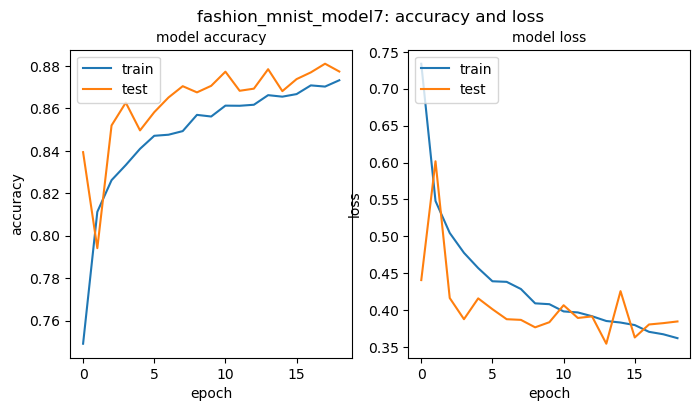

In [38]:
model7_name = 'model7'
model7_details = 'Layers:256, 128, 64, 32, 10. batch: 32. Early stopping. Dropout 0.2 and Batch normalization. Pre normliz the data.'

time_start = time.time()

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a model6
model7 = Sequential()
model7.add(Input(shape = (784,)))
model7.add(Dense(256, activation='relu'))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))
model7.add(Dense(128, activation='relu'))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))
model7.add(Dense(64, activation='relu'))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))
model7.add(Dense(32, activation='relu'))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.Dropout(0.2))
model7.add(Dense(10, activation='sigmoid'))
model7.summary()

# Compile the model7
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model7
history7 = model7.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model7
loss7, accuracy7 = model7.evaluate(X_test, y_test)

# Predict the test set
y_pred7 = model7.predict(X_test)

time_end = time.time()
time_model7 = time_end - time_start
print(f'Training and inference time for {model7_name} is {time_model7:.2f} seconds')

model7_data = {'history': history7, 'loss': loss7, 'accuracy': accuracy7, 'model_name': model7_name, 'time': time_model7}

plot_history(history7, 'fashion_mnist_model7')

<b><u>Model 8:</u></b> Modify the dropout layer to 0.25 and change the batch size to 128.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_18 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_19 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 64)              

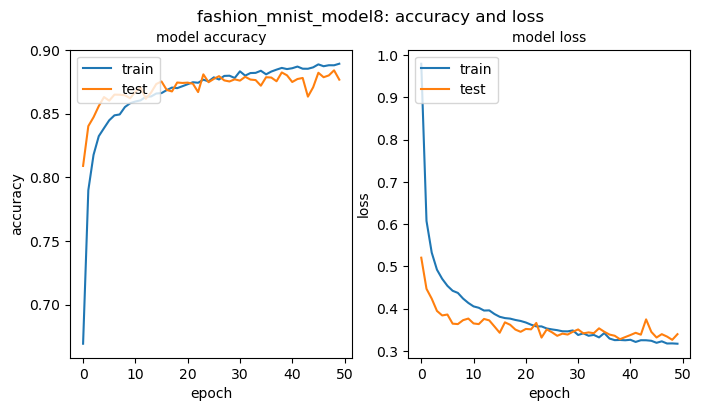

In [39]:
# Option 8: Add batch normalization and dropout layers
model8_name = 'model8'
model8_details = 'Layers:64, 64, 64, 10. batch: 128. Epochs: 50. Dropout 0.25 and Batch normalization. Pre normliz the data'

time_start = time.time()

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a model8
model8 = Sequential()
model8.add(Input(shape = (784,)))
model8.add(Dense(64, activation='relu'))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.25))
model8.add(Dense(64, activation='relu'))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.25))
model8.add(Dense(64, activation='relu'))
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.Dropout(0.50))
model8.add(Dense(10, activation='sigmoid'))
model8.summary()

# Compile the model8
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model8
history8 = model8.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model8
loss8, accuracy8 = model8.evaluate(X_test, y_test)

# Predict the test set
y_pred8 = model8.predict(X_test)

time_end = time.time()
time_model8 = time_end - time_start
print(f'Training and inference time for {model8_name} is {time_model8:.2f} seconds')

model8_data = {'history': history8, 'loss': loss8, 'accuracy': accuracy8, 'model_name': model8_name, 'time': time_model8}

plot_history(history8, 'fashion_mnist_model8')

<u><b>Model 9:</b></u> Use the same configuration without early stoping and with 100 epochs.

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_21 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_22 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 128)             

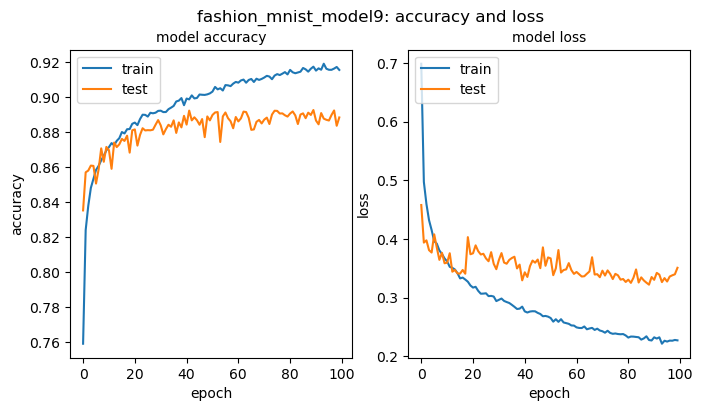

In [40]:
# Option 9: Add batch normalization and dropout layers
model9_name = 'model9'
model9_detailes = 'Layers:256, 128, 64, 10. batch: 128. Epochs: 100. Dropout 0.25 and Batch normalization. Pre normliz the data. 100 epochs'

time_start = time.time()

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a model9
model9 = Sequential()
model9.add(Input(shape = (784,)))
model9.add(Dense(256, activation='relu'))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Dropout(0.3))
model9.add(Dense(128, activation='relu'))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Dropout(0.3))
model9.add(Dense(64, activation='relu'))
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.Dropout(0.3))
model9.add(Dense(10, activation='sigmoid'))
model9.summary()

# Compile the model9
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model9
history9 = model9.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model9
loss9, accuracy9 = model9.evaluate(X_test, y_test)

# Predict the test set
y_pred9 = model9.predict(X_test)

time_end = time.time()
time_model9 = time_end - time_start
print(f'Training and inference time for {model9_name} is {time_model9:.2f} seconds')

model9_data = {'history': history9, 'loss': loss9, 'accuracy': accuracy9, 'model_name': model9_name, 'time': time_model9}

plot_history(history9, 'fashion_mnist_model9')


Model: "model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 batch_normalization_24 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0  

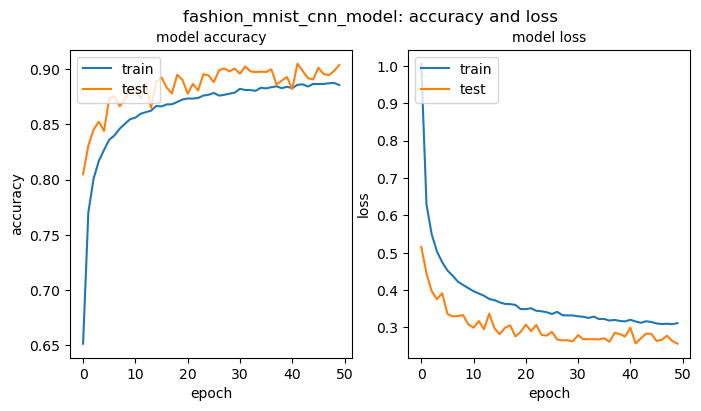

In [66]:

model10_name = 'model10'

# Start timing
time_start = time.time()

# Create the CNN model
model10 = Sequential(name=model10_name)
model10.add(Input(shape=(28, 28, 1)))  # Adjusted input shape for image data
model10.add(Conv2D(64, (2, 2), activation='relu'))
model10.add(MaxPooling2D((2, 2)))
model10.add(BatchNormalization())
model10.add(Dropout(0.25))

model10.add(Conv2D(64, (2, 2), activation='relu'))
model10.add(MaxPooling2D((2, 2)))
model10.add(BatchNormalization())
model10.add(Dropout(0.25))

model10.add(Conv2D(64, (2, 2), activation='relu'))
model10.add(MaxPooling2D((2, 2)))
model10.add(BatchNormalization())
model10.add(Dropout(0.25))

model10.add(Flatten())
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(10, activation='softmax'))

model10.summary()

# Compile the model
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to monitor the validation loss and stop training when it starts to increase
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Ensure X_train and X_test are NumPy arrays. If they are DataFrames, convert them to NumPy arrays first.
# If using DataFrame, convert with .values or .to_numpy() before reshaping.
X_train_reshaped = X_train.values.reshape((-1, 28, 28, 1))
X_test_reshaped = X_test.values.reshape((-1, 28, 28, 1))

# Proceed with model training, evaluation, and prediction using the reshaped data
history10 = model10.fit(X_train_reshaped, y_train, epochs=50, batch_size=128, validation_data=(X_test_reshaped, y_test))

# Evaluate the model10
loss10, accuracy10 = model10.evaluate(X_test_reshaped, y_test)

# Predict the test set
y_pred10 = model10.predict(X_test_reshaped)

# End timing
time_end = time.time()
time_model10 = time_end - time_start
print(f'Training and inference time for {model10_name} is {time_model10:.2f} seconds')

model10_data = {'history': history10, 'loss': loss10, 'accuracy': accuracy10, 'model_name': model10_name, 'time': time_model10}

plot_history(history10, 'fashion_mnist_cnn_model')

In [67]:
def compare_models(model_data):
  # Create comparison table with the results of the models
  dfs = []
  for data in model_data:
    model = data['model_name']
    history = data['history']
    loss = round(data['loss'], 4)  # Fix: Round the float value
    accuracy = f'{data["accuracy"] * 100:.0f}%'
    validation_accuracy = f'{max(history.history["val_accuracy"]) * 100:.0f}%'
    validation_loss = round(min(history.history['val_loss']), 4)
    epochs = len(history.history['accuracy'])
    run_time_minutes = f'{round(data["time"] / 60,1)} min'
    training_accuracy_start = f'{history.history["accuracy"][0] * 100:.0f}%'
    training_accuracy_end = f'{history.history["accuracy"][-1] * 100:.0f}%'
    validation_accuracy_peak = f'{max(history.history["val_accuracy"]) * 100:.0f}%'
    validation_accuracy_peak_epoch = np.argmax(history.history["val_accuracy"]) + 1
    training_loss_start = round(history.history['loss'][0],4)
    training_loss_end = round(history.history['loss'][-1],4)
    training_loss_bottom = round(min(history.history['loss']),4)
    training_loss_bottom_epoch = np.argmin(history.history['loss']) + 1
    df = pd.DataFrame({'Model': [model],
               'Test accuracy': [accuracy],
               'Validation accuracy': [validation_accuracy],
               'Test loss': [loss],
               'Validation loss': [validation_loss],
               'Epoch': [epochs],
               'Run time': [run_time_minutes],
               'Training accuracy start': [training_accuracy_start],
               'Traning accuracy end': [training_accuracy_end],
               'Validation accuracy peak': [validation_accuracy_peak],
               'Validation accuracy peak epoch': [validation_accuracy_peak_epoch],
               'Training loss start': [training_loss_start],
               'Training loss end': [training_loss_end],
               'Traning loss bottom': [training_loss_bottom],
               'Traning loss bottom epoch': [training_loss_bottom_epoch]})
    dfs.append(df)
    
  df = pd.concat(dfs, ignore_index=True)
  return df

model_data = [model1_data, model2_data, model3_data, model4_data, model5_data, model6_data, model7_data, model8_data, model9_data, model10_data]
print('Comparison table of the models: \n\n')
compare_models(model_data)

Comparison table of the models: 




,Model,Test accuracy,Validation accuracy,Test loss,Validation loss,Epoch,Run time,Training accuracy start,Traning accuracy end,Validation accuracy peak,Validation accuracy peak epoch,Training loss start,Training loss end,Traning loss bottom,Traning loss bottom epoch
0,model1,88%,88%,0.3878,0.3518,24,1.3 min,72%,90%,88%,19,2.2474,0.2618,0.2618,24
1,model2,77%,77%,0.5444,0.5444,28,1.3 min,47%,75%,77%,27,3.1286,0.5844,0.5815,27
2,model3,88%,88%,0.3500,0.3430,13,0.8 min,82%,91%,88%,8,0.5201,0.2379,0.2379,13
3,model4,88%,89%,0.3627,0.3288,26,1.6 min,76%,88%,89%,25,0.7027,0.3196,0.3196,26
4,model5,88%,88%,0.3633,0.3325,20,2.3 min,76%,88%,88%,19,0.7143,0.3313,0.3313,20
5,model6,88%,89%,0.3593,0.3360,25,2.4 min,76%,89%,89%,20,0.7219,0.3192,0.3192,25
6,model7,88%,88%,0.3847,0.3546,19,3.4 min,75%,87%,88%,18,0.7338,0.3621,0.3621,19
7,model8,88%,88%,0.3393,0.3259,50,1.6 min,67%,89%,88%,49,0.9796,0.3167,0.3167,50
8,model9,89%,89%,0.3509,0.3221,100,5.5 min,76%,92%,89%,90,0.6989,0.2271,0.2214,94
9,model10,90%,91%,0.2565,0.2565,50,24.7 min,65%,89%,91%,42,1.0061,0.3116,0.3088,49


In [ ]:
# Print data frame of descriptions of all models
model_descriptions = pd.DataFrame({'Model': [model1_name, model2_name, model3_name, model4_name, model5_name, model6_name, model7_name, model8_name, model9_name, model10_name],
              'Details': [model1_detailes, model2_detailes, model3_detailes, model4_detailes, model5_detailes, model6_details, model7_details, model8_details, model9_detailes, 'CNN model']})

styled_model_descriptions = model_descriptions.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

print('Descriptions of all models: \n\n')
with pd.option_context('display.max_colwidth', 1000):
    display(styled_model_descriptions)

Descriptions of all models: 




,Model,Details
0,model1,"Layers:128, 64, 32, 10. batch: 64. Early stopping"
1,model2,"Layers:128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2"
2,model3,"Layers:128, 64, 32, 10. batch: 64. Early stopping. Batch normalization"
3,model4,"Layers:128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization"
4,model5,"Layers:256, 128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization"
5,model6,"Layers:256, 128, 64, 32, 10. batch: 64. Early stopping. Dropout 0.2 and Batch normalization. Pre normliz the data"
6,model7,"Layers:256, 128, 64, 32, 10. batch: 32. Early stopping. Dropout 0.2 and Batch normalization. Pre normliz the data."
7,model8,"Layers:64, 64, 64, 10. batch: 128. Epochs: 50. Dropout 0.25 and Batch normalization. Pre normliz the data"
8,model9,"Layers:256, 128, 64, 10. batch: 128. Epochs: 100. Dropout 0.25 and Batch normalization. Pre normliz the data. 100 epochs"
9,model10,CNN model


In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data frame of the confusion for each class for each model
def confusion_classes_df(y_true, y_pred):
  cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
  cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
  # Get only the diagonal values
  cm_percentage = np.diag(cm_percentage)
  return cm_percentage

models = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10]
confusion_classes = pd.DataFrame(index=labels_dict.values(), columns=[f'Model{i+1}' for i in range(len(models))])
for i in range(len(models)):
  confusion_classes[f'Model{i+1}'] = confusion_classes_df(y_test, models[i])

confusion_classes.index = labels_dict.values()

# Add mean row and column
confusion_classes.loc['Mean'] = confusion_classes.mean()
confusion_classes['Mean'] = confusion_classes.mean(axis=1)

def apply_correct_global_gradient_and_format(df):
    # Define a colormap
    cm = sns.diverging_palette(10, 133, as_cmap=True)
    # Apply formatting and color scale globally
    styled_df = df.style.background_gradient(cmap=cm, axis=None).format("{:.0f}%")
    # Add title
    styled_df.set_caption('Percentage of correct classifications for each class for each model')
    return styled_df

# Display the styled and correctly globally scaled dataframe
display(apply_correct_global_gradient_and_format(confusion_classes))

,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,Mean
T-shirt/top,85%,84%,82%,82%,83%,87%,80%,85%,84%,82%,84%
Trouser,97%,3%,96%,97%,97%,98%,96%,97%,98%,98%,88%
Pullover,80%,94%,80%,76%,80%,86%,88%,85%,80%,84%,83%
Dress,90%,77%,92%,88%,92%,91%,90%,90%,91%,90%,89%
Coat,81%,18%,76%,84%,86%,75%,76%,83%,87%,87%,75%
Sandal,96%,96%,92%,94%,89%,98%,94%,95%,97%,97%,95%
Shirt,49%,13%,74%,71%,61%,64%,66%,54%,64%,75%,59%
Sneaker,61%,24%,98%,97%,98%,94%,97%,95%,95%,96%,85%
Bag,96%,21%,97%,97%,98%,99%,97%,97%,97%,98%,90%
Ankle boot,2%,5%,95%,96%,97%,91%,94%,97%,97%,97%,77%


<u>In my findings, I refer to the following:</u>

- <b>Accuracy and loss functions plotted for each model</b>
- <b>Comparison table of model results</b> - Includ: Test accurac, Validation accuracy,Test loss, Validation loss, Epoch, Run time,	Training accuracy start,	Traning accuracy end,	Validation accuracy peak,	Validation accuracy peak epoch,	Training loss start,	Training loss end,	Traning loss bottom,Traning loss bottom epoch
- <b>Description of model characteristics</b> - Includ: The main changed in the configuration of each model.
- <b>Table of percentage of correct classifications</b> - Includ: The correct class accuracy precentage. Mean sucsess rate for each of the labels and for each of the models.

<u>I tested 10 model configurations:</u>
Here are the main insights we can draw from each model:

<b>Model 1</b> - A simple Neural Network doesn't necessarily yield good results without modifications.<br>
<b>Model 2</b> - A dropout rate of 0.2 enhances the model's success in some cases but decreases overall accuracy.<br>
<b>Model 3</b> - Adding batch normalization alone significantly improves accuracy and reduces the number of epochs required to achieve peak accuracy.<br>
<b>Model 4</b> - Utilizing both batch normalization and a dropout rate of 0.2 does not show any improvement.<br>
<b>Model 5</b> - Introducing an additional layer results in minimal improvement.<br>
<b>Model 6</b> - Pre-normalizing the data does not significantly affect accuracy or outcomes.<br>
<b>Model 7</b> - Decreasing the batch size reduces model performance.<br>
<b>Model 8</b> - Increasing the batch size while reducing the number of neurons in each layer does not enhance outcomes compared to previous model configurations.<br>
<b>Model 9</b> - Raising the number of epochs improves the accuracy and performance of the model.<br>
<b>Model 10</b> - This model refers to research conducted at Banaras Hindu University, Varanasi, India, which tested various configurations of the best CNN models for the MNIST dataset. According to their findings, the best<br> configuration includes:<br>
- 3 Convolutional Layers with (2x2) filter size.
- 2 Fully Connected Layers.
- Dropout rate of 0.25 after each convolutional layer to prevent overfitting.
- Adam optimizer and Softmax activation function for the output layer.
- Recommended batch size of 128.
- Suggested training duration of 50 epochs.
<br><br>As we observe, the success of their recommendation does not significantly outperform my ninth model. I incorporated their suggestions for batch size, layer count, and dropout rate.<br> Model 10 took more than 16 minutes to run, whereas the second-best model took less than 6 minutes. <br>I choose to use <b>model 9</b>.

<u>Refference:</u> <br>
<i>Kadam, S. S., Adamuthe, A. C., & Patil, A. B. (2020). CNN Model for Image Classification on MNIST and Fashion-MNIST Dataset. Journal of Scientific Research, 64(2). Institute of Science, Banaras Hindu University, Varanasi, India.</i>

<a href="[url](https://bhu.ac.in/research_pub/jsr/Volumes/JSR_64_02_2020/51.pdf)">CNN Model for Image Classification on MNIST and Fashion-MNIST Dataset</a>

Images that model 10 classify right and model 9 classify wrong with their lables:


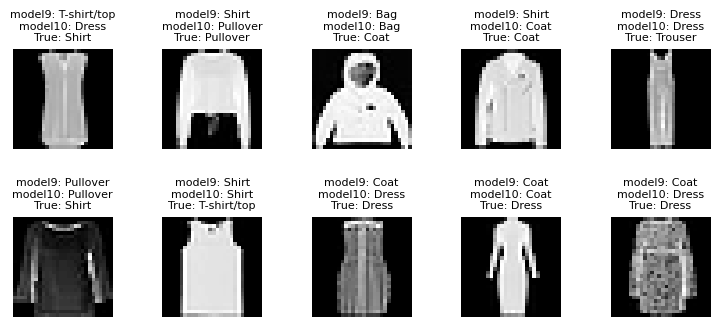

In [ ]:
# print picturs of images that model 10 classify right and model 9 classify wrong with their lables
def display_not_matching_images(X_test, y_pred_1, y_pred_2, y_test, model1_name, model2_name):
    # Find the indices of the images that were not classified correctly
    incorrect_indices = np.nonzero(np.argmax(y_pred_1, axis=1) != np.argmax(y_test, axis=1))
    correct_indices = np.nonzero(np.argmax(y_pred_2, axis=1) == np.argmax(y_test, axis=1))

    # Plot the first 25 small test images, their predicted label, and the true label
    fig, axes = plt.subplots(2, 5, figsize=(9, 4))
    axes = axes.ravel()

    for i in np.arange(0, 10):
        axes[i].imshow(X_test.values[incorrect_indices[0][i]].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"{model1_name}: {labels_dict[np.argmax(y_pred_1[incorrect_indices[0][i]])]}\n{model2_name}: {labels_dict[np.argmax(y_pred_2[incorrect_indices[0][i]])]}\nTrue: {labels_dict[np.argmax(y_test[incorrect_indices[0][i]])]}", fontsize=8)
        axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)

print('Images that model 10 classify right and model 9 classify wrong with their lables:')
display_not_matching_images(X_test, y_pred9, y_pred10, y_test, model9_name, model10_name)

### **Task 1.c:** Evaluating results and model8 using the test fation MINST data set:

In [ ]:
def evaluation_of_test_set(model, X_test_set, y_test_set):
  # Predict the test set
  y_pred = model.predict(X_test_set)
  # Evaluate the model
  loss, accuracy = model.evaluate(X_test_set, y_test_set)
  return loss, accuracy, y_pred

X_test_set = fation_mnist_test_df.iloc[:, 1:]
y_test_set = fation_mnist_test_df['label']
y_test_set = to_categorical(y_test_set)

models = [model1, model2, model3, model4, model5, model6, model7, model8, model9]
losses = []
accuracies = []
y_preds = []
for model in models:
    loss, accuracy, y_pred = evaluation_of_test_set(model, X_test_set, y_test_set)
    losses.append(loss)
    accuracies.append(accuracy)
    y_preds.append(y_pred)

confusion_metrixes = [confusion_matrix(np.argmax(y_test_set, axis=1), np.argmax(y_pred, axis=1)) for y_pred in y_preds]

In [ ]:
# Create a data frame of the test set evaluation
test_set_evaluation = pd.DataFrame({'Model': [model1_name, model2_name, model3_name, model4_name, model5_name, model6_name, model7_name, model8_name, model9_name],
              'Test loss': losses,
              'Test accuracy': accuracies})

# Display the data frame
test_set_evaluation['Test accuracy'] = test_set_evaluation['Test accuracy'].map(lambda x: f'{x * 100:.0f}%')
test_set_evaluation['Test loss'] = test_set_evaluation['Test loss'].map(lambda x: round(x, 4))

test_set_evaluation

,Model,Test loss,Test accuracy
0,model1,0.3768,88%
1,model2,0.5761,75%
2,model3,0.3481,88%
3,model4,0.3477,88%
4,model5,0.3515,88%
5,model6,0.3668,89%
6,model7,0.3894,88%
7,model8,0.3508,88%
8,model9,0.3673,89%


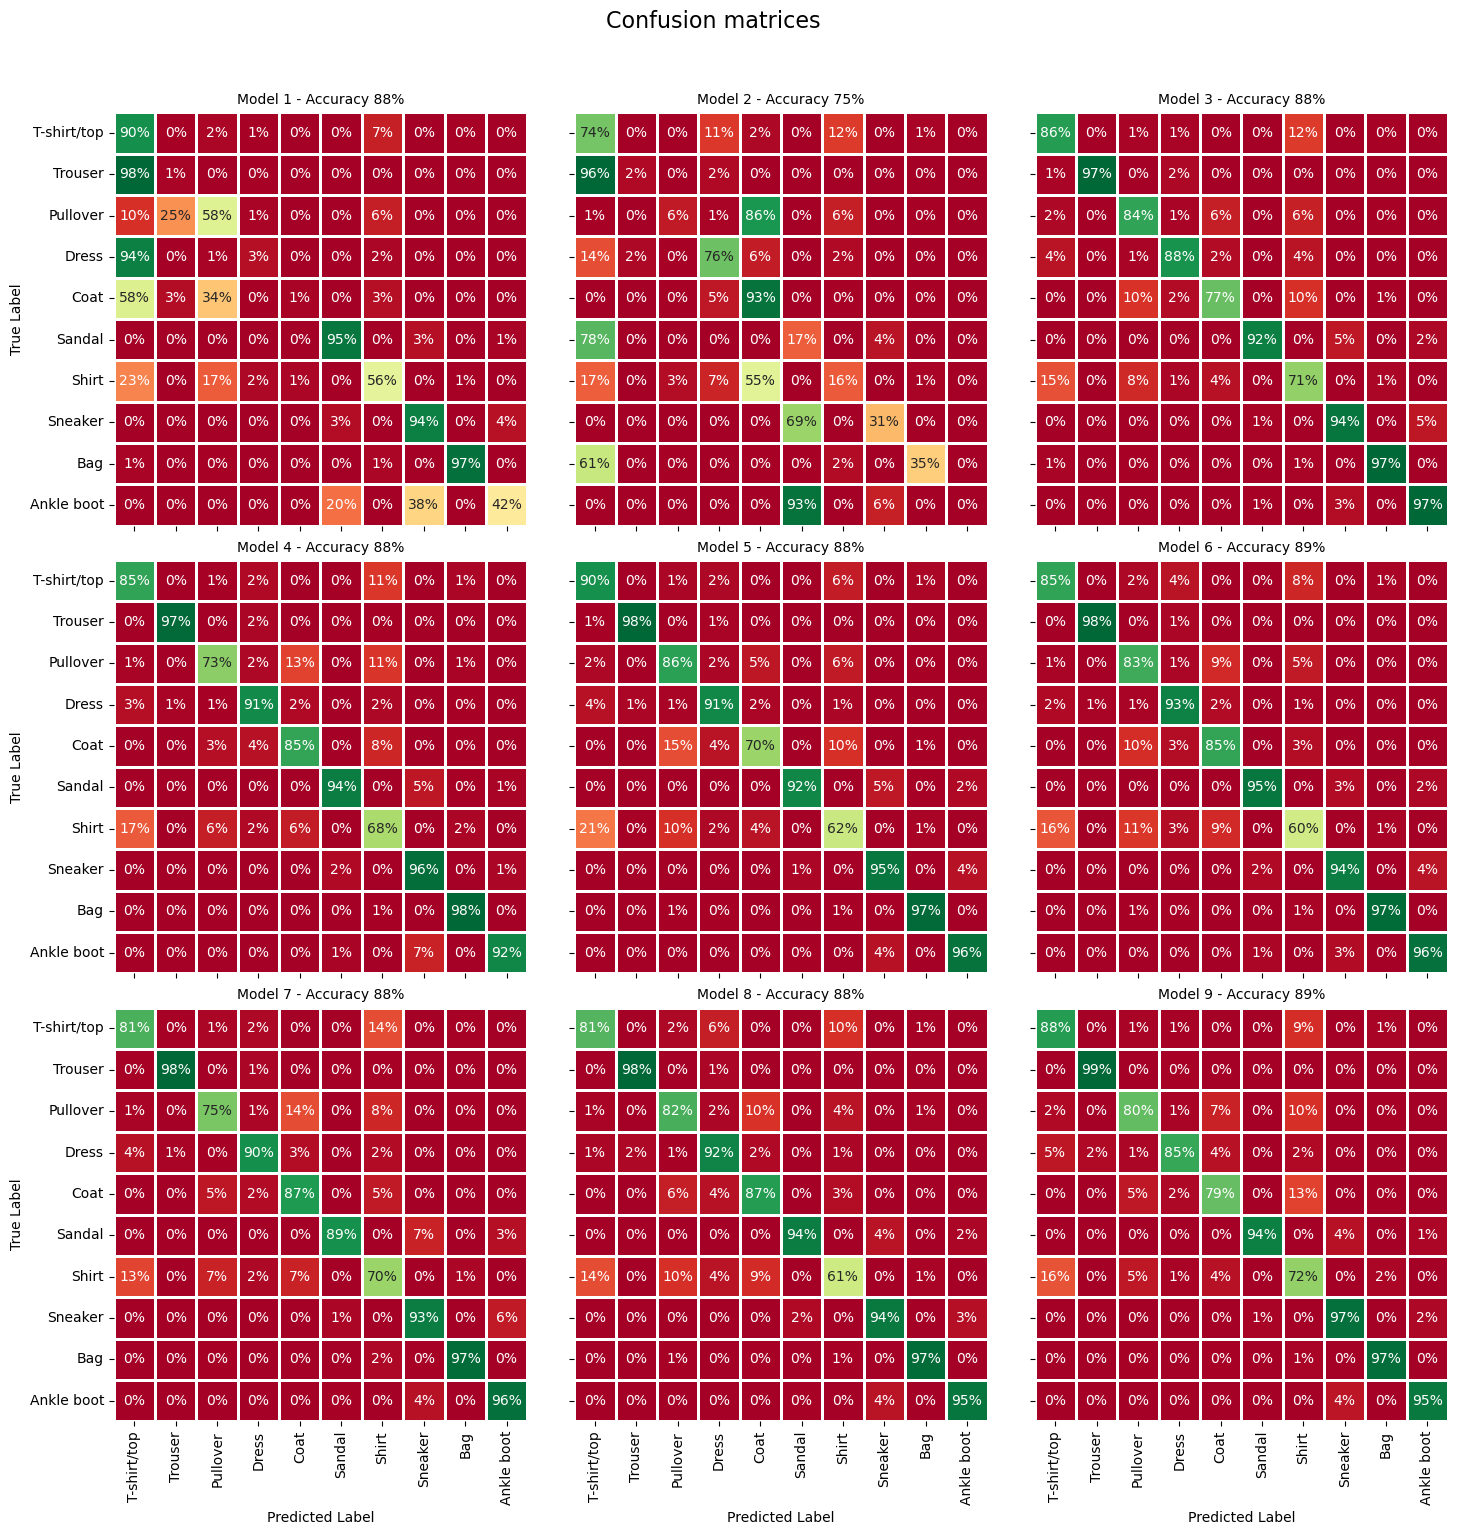

In [ ]:
def plot_confusion_matrixes(confusion_metrixes):
  fig, axes = plt.subplots(3, 3, figsize=(15, 15))
  axes = axes.ravel()
  for i in range(len(confusion_metrixes)):
    cm = confusion_metrixes[i]
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
    ax = sns.heatmap(cm_percentage, annot=True, fmt=".0f", cmap='RdYlGn', xticklabels=labels_dict.values(), yticklabels=labels_dict.values(), square=1, linewidths=1, annot_kws={"size": 10}, ax=axes[i])
    for t in ax.texts:
      t.set_text(t.get_text() + "%")
    ax.set_title(f'Model {i+1} - Accuracy {test_set_evaluation["Test accuracy"][i]}', fontsize=10)
    ax.collections[0].colorbar.remove()
 
    # Display labels only on outer plots
    if i // 3 == 2:
      ax.xaxis.set_tick_params(labelsize=10)
      ax.set_xlabel('Predicted Label')
    else:
      ax.set_xticklabels([])
    if i % 3 == 0:
      ax.yaxis.set_tick_params(labelsize=10)
      ax.set_ylabel('True Label')
    else:
      ax.set_yticklabels([])

  # Add color bar outside the subplots
  fig.suptitle('Confusion matrices', fontsize=16, y=1.02)
  plt.tight_layout()
  plt.show()

plot_confusion_matrixes(confusion_metrixes)

>We can learn that most of the models are confused between shirts, coats, pullovers, and t-shirts/tops.

### **Task 2:** Sentiment analysis for Tweeter tweets

In [50]:
from gensim.utils import simple_preprocess
from gensim.corpora.dictionary import Dictionary
from gensim.models import Word2Vec, KeyedVectors
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, GlobalMaxPool1D
import os

In [43]:
# load csv file
tweet_sentiment = pd.read_csv('tweet_sentiment.csv')
tweet_sentiment_test = pd.read_csv('tweet_sentiment_test.csv')

print(f"Loaded {len(tweet_sentiment)} tweets")
print(f"File size: {tweet_sentiment['tweet'].apply(len).sum()/1024/1024:1.1f}MB")
print(f"Positive tweets: {sum(tweet_sentiment['polarity']==1)/len(tweet_sentiment)*100:1.1f}%")
print(f"Negative tweets: {sum(tweet_sentiment['polarity']==-1)/len(tweet_sentiment)*100:1.1f}%")
print(f"Length of longest tweet: {tweet_sentiment['tweet'].apply(len).max()} characters")
print(tweet_sentiment[tweet_sentiment['tweet'].apply(len) == tweet_sentiment['tweet'].apply(len).max()]['tweet'].values[0])
print(f"Sentiment: {tweet_sentiment[tweet_sentiment['tweet'].apply(len) == tweet_sentiment['tweet'].apply(len).max()]['polarity'].values[0]}")
print(f"Length of shortest tweet: {tweet_sentiment['tweet'].apply(len).min()} characters")
print(tweet_sentiment[tweet_sentiment['tweet'].apply(len) == tweet_sentiment['tweet'].apply(len).min()]['tweet'].values[0])
print(f"Sentiments types: {tweet_sentiment['polarity'].unique()}")

Loaded 1400000 tweets
File size: 98.9MB
Positive tweets: 50.0%
Negative tweets: 50.0%
Length of longest tweet: 374 characters
@catfish_ohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸?à¸²à¸£à¹Œà¸•à¸¹à¸™à¸?à¸¸à¹‚à¸£à¸°(à¸ªà¸±à¸ªà¹†+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹„à¸”à¹‰à¹?à¸—à¸™à¸™à¸°à¸žà¸­à¸”à¸µà¸¡à¸´à¹‚à¸?à¸°à¸«à¸§à¸‡(à¸‚à¸™à¸²à¸”à¹€à¸Ÿà¸´à¸™à¹?à¸?à¸¢à¸±à¸‡à¹€à¸„à¸¢à¹ƒà¸«à¹‰à¹„à¸¡à¹ˆà¹ƒà¸Šà¹ˆà¹€à¸«à¸£à¸­.à¹?à¸•à¹ˆà¸Šà¹ˆà¸²à¸‡à¹€à¸«à¸­à¸°à¸£à¸²à¸¢à¸™à¸±à¹‰à¸™à¹€à¸‚à¸²à¹‚à¸¡à¹€à¸­à¸°à¸?à¸§à¹ˆà¸²à¸›à¸¥à¸²à¹?à¸¡à¸§à¹€à¸¢à¸­à¸° = 
Sentiment: 1
Length of shortest tweet: 6 characters
Ugh   
Sentiments types: [ 1 -1]


In [44]:
# Tokenize the tweets using gensim simple_preprocess
time_start = time.time()
tweet_sentiment['text_tokens'] = tweet_sentiment['tweet'].apply(simple_preprocess)
time_end = time.time()
time_tokenization = time_end - time_start
print(f'Time to tokenize the tweets: {time_tokenization:.2f} seconds')

Time to tokenize the tweets: 26.47 seconds


In [45]:
time_start = time.time()
tokenized_tweets = tweet_sentiment['text_tokens']
dictionary = Dictionary(tokenized_tweets)
dictionary.add_documents([['<padding>', '<unk>']])
dictionary.add_documents(documents=tokenized_tweets)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=500000, keep_tokens=['<padding>', '<unk>'])
time_end = time.time()
time_dictionary = time_end - time_start
print(f'Time to create the dictionary: {time_dictionary:.2f} seconds')

Time to create the dictionary: 82.82 seconds


In [46]:
time_start = time.time()
tweets_tokens_unk = [[token if token in dictionary.token2id else '<unk>' for token in review_text] for review_text in tokenized_tweets]
tweet_sentiment['text_tokens'] = tweets_tokens_unk
time_end = time.time()
time_unk = time_end - time_start
print(f'Time to replace tokens with <unk>: {time_unk:.2f} seconds')

Time to replace tokens with <unk>: 9.32 seconds


In [47]:
print(f"Mean length of text_tokens: {tweet_sentiment['text_tokens'].apply(len).mean():.2f}")
print(f"Median length of text_tokens: {tweet_sentiment['text_tokens'].apply(len).median():.2f}")
print(f"Max length of text_tokens: {tweet_sentiment['text_tokens'].apply(len).max()}")
print(f"Min length of text_tokens: {tweet_sentiment['text_tokens'].apply(len).min()}")

Mean length of text_tokens: 12.38
Median length of text_tokens: 11.00
Max length of text_tokens: 52
Min length of text_tokens: 0


In [51]:
# train word to vec
time_start = time.time()
word2vec_model = Word2Vec(sentences=tweets_tokens_unk, vector_size=100, window=5, min_count=4, sg=1, negative=10, workers=os.cpu_count()//2)
word2vec_model.train(tweets_tokens_unk, total_examples=word2vec_model.corpus_count, epochs=3)
time_end = time.time()
time_word2vec = time_end - time_start
print(f'Time to train the word2vec model: {time_word2vec:.2f} seconds')

Time to train the word2vec model: 469.72 seconds


In [52]:
w2v = KeyedVectors(vector_size=word2vec_model.vector_size, count=len(word2vec_model.wv)+1)
w2v.index_to_key[1:] = word2vec_model.wv.index_to_key
w2v.index_to_key[0] = '<padding>'
w2v.key_to_index ={key:value+1 for key, value in word2vec_model.wv.key_to_index.items()}
w2v.key_to_index['<padding>'] =  0
w2v.vectors[1:] = word2vec_model.wv.vectors

In [53]:
# Train dictionary
def doc2idx(tokens, keyed_vectors):
     return [keyed_vectors.key_to_index.get(token, 0) for token in tokens]

# tokens -> word ids. 
tweet_sentiment['tokens'] = tweet_sentiment['text_tokens'].apply(doc2idx, keyed_vectors=w2v)

In [54]:
max_comment_length=50
vocab_size = len(w2v)

tweet_sentiment['corpus'] = pad_sequences(tweet_sentiment['tokens'],
    maxlen = max_comment_length, 
    padding = 'post',
    truncating = 'post',
    value = w2v.key_to_index['<padding>']).tolist()

In [55]:
tweet_sentiment.head()

,polarity,tweet_id,tweet,text_tokens,tokens,corpus
0,1,2049966842,@_CrC_ WOOT! i'm great. thanks. we are the kin...,"[woot, great, thanks, we, are, the, kind, eyes...","[1263, 98, 79, 46, 34, 3, 504, 630, 1637, 53, ...","[1263, 98, 79, 46, 34, 3, 504, 630, 1637, 53, ..."
1,1,2062338304,@toytoyy ayeeee girl,"[<unk>, ayeeee, girl]","[1, 72349, 254]","[1, 72349, 254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,-1,2032451037,had lovely dinner up in the drummonds. wreaked...,"[had, lovely, dinner, up, in, the, <unk>, <unk...","[63, 418, 363, 27, 9, 3, 1, 1, 171, 36, 2, 138...","[63, 418, 363, 27, 9, 3, 1, 1, 171, 36, 2, 138..."
3,1,1993541290,Going to the USS intreped just saw ground zer...,"[going, to, the, uss, <unk>, just, saw, ground...","[45, 2, 3, 27014, 1, 18, 279, 2765, 3068]","[45, 2, 3, 27014, 1, 18, 279, 2765, 3068, 0, 0..."
4,-1,2204381262,Busted my ass infront of tin room tonight. Mis...,"[busted, my, ass, infront, of, tin, room, toni...","[3155, 4, 547, 7435, 11, 6769, 402, 120, 88, 4...","[3155, 4, 547, 7435, 11, 6769, 402, 120, 88, 4..."


In [56]:
embedding_vector_size = 100
word_embedding_layer = Embedding(input_dim= len(w2v), 
                               output_dim = embedding_vector_size, 
                               mask_zero = False,
                               trainable = False
                            )
word_embedding_layer.build((1,))
word_embedding_layer.set_weights([w2v.vectors])

word_embeddings  = word_embedding_layer(np.stack(tweet_sentiment['corpus']))
word_vec=Flatten()(word_embeddings) # Flatten the 3D tensor to 2D for the dense layer

In [57]:
train_df, test_df  = train_test_split(tweet_sentiment, test_size=0.20, random_state=42)
test_df, valid_df  = train_test_split(test_df, test_size=0.50, random_state=42)
print(f"Data size: train = {len(train_df)}, validation = {len(valid_df)}, test = {len(test_df)}")

Data size: train = 1120000, validation = 140000, test = 140000


In [58]:
embedding_layers = Sequential()

embedding_layers.add(Input(shape=(max_comment_length,), dtype='float64'))

# create embedding layer and prepopulate it with word2vec weights
word_embedding_layer=Embedding(input_dim= len(w2v), 
                               output_dim=embedding_vector_size, 
                               mask_zero=False,
                               trainable = False
                            )
word_embedding_layer.build((1,))
word_embedding_layer.set_weights([w2v.vectors])

embedding_layers.add(word_embedding_layer)

embedding_layers.add(GlobalMaxPool1D())

embedding_layers.summary()

classification_layers = Sequential()
classification_layers.add(Input(shape=(embedding_vector_size,), dtype='float64' ))
classification_layers.add( Dense(100,  activation= 'relu'))
classification_layers.add( Dense(120,  activation= 'relu'))
classification_layers.add( Dense(1,    activation= 'sigmoid'))
classification_layers.summary()

model_1 = Sequential()
model_1.add(embedding_layers)
model_1.add(classification_layers)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           9098800   
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
Total params: 9098800 (34.71 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 9098800 (34.71 MB)
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 120)               1

In [59]:
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['acc']) 

In [60]:
model_1.fit(
    x= np.stack(train_df['corpus']), 
    y= train_df['polarity'].values>0, 
    validation_data = (np.stack(valid_df['corpus']), valid_df['polarity'].values>0),    
    batch_size = 250,
    epochs=10, 
    verbose=1
)

Epoch 1/10
4480/4480 [==============================] - 49s 10ms/step - loss: 0.5461 - acc: 0.7154 - val_loss: 0.5330 - val_acc: 0.7258
Epoch 2/10
4480/4480 [==============================] - 44s 10ms/step - loss: 0.5257 - acc: 0.7303 - val_loss: 0.5252 - val_acc: 0.7299
Epoch 3/10
4480/4480 [==============================] - 31s 7ms/step - loss: 0.5180 - acc: 0.7355 - val_loss: 0.5146 - val_acc: 0.7388
Epoch 4/10
4480/4480 [==============================] - 30s 7ms/step - loss: 0.5134 - acc: 0.7387 - val_loss: 0.5102 - val_acc: 0.7420
Epoch 5/10
4480/4480 [==============================] - 31s 7ms/step - loss: 0.5096 - acc: 0.7416 - val_loss: 0.5163 - val_acc: 0.7361
Epoch 6/10
4480/4480 [==============================] - 26s 6ms/step - loss: 0.5071 - acc: 0.7435 - val_loss: 0.5058 - val_acc: 0.7442
Epoch 7/10
4480/4480 [==============================] - 24s 5ms/step - loss: 0.5049 - acc: 0.7452 - val_loss: 0.5061 - val_acc: 0.7447
Epoch 8/10
4480/4480 [==============================]

In [61]:
print('Model 1 evaluation:')
loss, accuracy = model_1.evaluate(np.stack(test_df['corpus']), test_df['polarity'].values>0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Model 1 evaluation:
4375/4375 [==============================] - 14s 3ms/step - loss: 0.5068 - acc: 0.7458
Test loss: 0.5068
Test accuracy: 0.7458


In order to train the sentiment analysis model,  I used gensim to cover all tweets using Word2Vec method. 
After creating these word embeddings I trained Neural Network, after splitting into train and test. 
We can see an accuracy of less than 80% and a loss of 0.556 according to the test set I split. 
I tried to use different MLP model configurations but didn't manage to improve the accuracy.
The reason for that might come from a couple of reasons:
- The tweets are very short, and it is hard to assume from a small number of words the polarity of the tweet
- The data set contains only positive and negative tweets, while many tweets can be classified as neutral. It might add dirt to the model. 
- The tweets contain nonverbal signs that might express the users' filing. In order to understand these signs we need to find them all and change them to a word that might express the sense of the sign, before embedding the words.
- I tried to change all the simple faces into words and add cleaning logic to the tweets, but I didn't manage to improve the model.

In [62]:
test_df['text_tokens'] = test_df['tweet'].apply(simple_preprocess)
tweets_test_tokens_unk = [[token if token in dictionary.token2id else '<unk>' for token in review_text] for review_text in test_df['text_tokens']]
test_df['text_tokens'] = tweets_test_tokens_unk
test_df['tokens'] = test_df['text_tokens'].apply(doc2idx, keyed_vectors=w2v)
test_df['corpus'] = pad_sequences(test_df['tokens'],
    maxlen = max_comment_length, 
    padding = 'post',
    truncating = 'post',
    value = w2v.key_to_index['<padding>']).tolist()

test_df['polarity_predicted'] = model_1.predict(np.stack(test_df['corpus'])) > 0.5 
test_df['polarity_predicted'] = test_df['polarity_predicted'].map(lambda x: 1 if x else -1)

4375/4375 [==============================] - 12s 3ms/step


In [63]:
tweet_sentiment_test['text_tokens'] = tweet_sentiment_test['tweet'].apply(simple_preprocess)
tweets_tokens_unk = [[token if token in dictionary.token2id else '<unk>' for token in review_text] for review_text in tweet_sentiment_test['text_tokens']]
tweet_sentiment_test['text_tokens'] = tweets_tokens_unk
tweet_sentiment_test['tokens'] = tweet_sentiment_test['text_tokens'].apply(doc2idx, keyed_vectors=w2v)
tweet_sentiment_test['corpus'] = pad_sequences(tweet_sentiment_test['tokens'],
    maxlen = max_comment_length, 
    padding = 'post',
    truncating = 'post',
    value = w2v.key_to_index['<padding>']).tolist()

In [64]:
# Create tweet_sentiment_test['polarity'] column by predicting the sentiment of the tweets using model_1
tweet_sentiment_test['polarity'] = model_1.predict(np.stack(tweet_sentiment_test['corpus'])) > 0.5 
tweet_sentiment_test['polarity'] = tweet_sentiment_test['polarity'].map(lambda x: 1 if x else -1)

6250/6250 [==============================] - 18s 3ms/step


In [65]:
# save the tweet_sentiment_test to csv file
df = tweet_sentiment_test[['tweet_id', 'polarity']]
file_name = 'sentiment_{308134212}.csv'
df.to_csv(file_name, index=False)

In the attached code I tried to predict the sentiment using <b>cardiffnlp/twitter-roberta-base-sentiment-latest</b> model from <b>Hugging Face</b> which has been trained on tweets.
After testing a sample of 10000 tweets from the train set, I found out that the accuracy of the model is 77%.
When filtering the natural tweets it got up to 84%
Testing only the natural tweets I found out it will be only 66%
It shows that referring to the natural tweets as positive or negative is challenging the model.
It might be a good try to combine these methods and run the MLP model only on the positive and negative tweets and see if it will manage to get higher than 84%,
Then think of other methods of dealing with the rest of the natural tweets.